In [1]:
import numpy as np
import scipy.linalg as linalg

from linear_algebra_utils import *
from digraph_algorithms import *

In [2]:
# Examples of orthogonal complement and subspace intersection from linear_algebra_utils
A1 = [
    np.array([
        [1.0], [1.0], [0.0]
    ]),
    np.array([
        [0.0], [0.0], [1.0]
    ])
]
A2 = [
    np.array([
        [1.0], [0.0], [0.0]
    ]),
    np.array([
        [0.0], [1.0], [1.0]
    ])
]
A3 = [
    np.array([
        [1.0], [1.0], [0.0]
    ]),
    np.array([
        [0.0], [1.0], [1.0]
    ])
]

In [3]:
orthogonal_complement(A1)

[array([[ 0.70710678],
        [-0.70710678],
        [ 0.        ]])]

In [23]:
subspace_intersection([A1,A2])

[array([[0.57735027],
        [0.57735027],
        [0.57735027]])]

In [24]:
subspace_intersection([A1])

[array([[0.70710678],
        [0.70710678],
        [0.        ]]),
 array([[0.],
        [0.],
        [1.]])]

In [25]:
subspace_intersection([A1,A2,A3])

array([[0.],
       [0.],
       [0.]])

In [7]:
# Example of augmenting a DAG with a root node
G = nx.DiGraph()
arrows = [('X', 'Z'), ('Y', 'Z')]
G.add_edges_from(arrows)

In [8]:
dimensions = {
    'X': 3,
    'Y': 3,
    'Z': 2,
}

In [9]:
# Construct (bases for) vector spaces at each node
bases = {}

for node in list(dimensions.keys()):
    basematrix = np.eye(dimensions[node])
    bases[node] = [basematrix[i][:,np.newaxis] for i in range(dimensions[node])]

In [10]:
nx.set_node_attributes(G,dimensions,'dimension')
nx.set_node_attributes(G,bases,'basis')

In [11]:
G.nodes['X']['basis']

[array([[1.],
        [0.],
        [0.]]),
 array([[0.],
        [1.],
        [0.]]),
 array([[0.],
        [0.],
        [1.]])]

In [26]:
# Construct linear maps at each edge
rep_maps = {
    ('X', 'Z'): np.array([
        [1.0,0.0,0.0],
        [0.0,1.0,1.0]
    ]),
    ('Y', 'Z'): np.array([
        [1.0,1.0,0.0],
        [0.0,0.0,1.0]
    ])
}

In [13]:
nx.set_edge_attributes(G,rep_maps,'rep map')

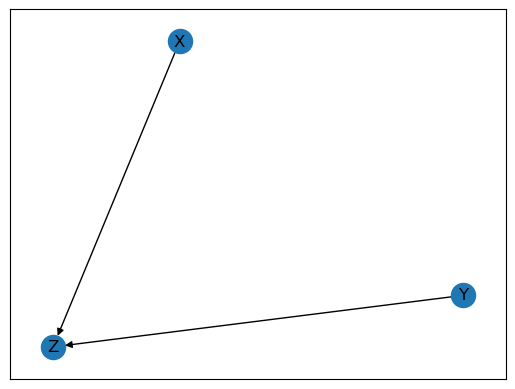

In [14]:
nx.draw_networkx(G)

In [15]:
G.edges[('X', 'Z')]['rep map']

array([[1., 0., 0.],
       [0., 1., 1.]])

In [16]:
Gp = augment_DAG_with_root(G)

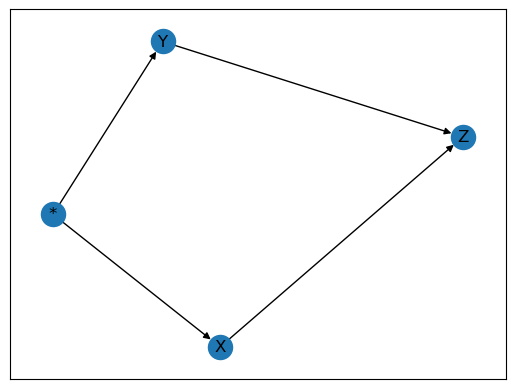

In [17]:
nx.draw_networkx(Gp)

In [18]:
Gp.nodes['*']

{'dimension': 6,
 'basis': [array([[1.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]]),
  array([[0.],
         [1.],
         [0.],
         [0.],
         [0.],
         [0.]]),
  array([[0.],
         [0.],
         [1.],
         [0.],
         [0.],
         [0.]]),
  array([[0.],
         [0.],
         [0.],
         [1.],
         [0.],
         [0.]]),
  array([[0.],
         [0.],
         [0.],
         [0.],
         [1.],
         [0.]]),
  array([[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [1.]])]}

In [21]:
Gp.edges[('*','X')]['rep map']

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

In [22]:
Gp.edges[('*','Y')]['rep map']

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [27]:
Tp = spanning_arborescence(Gp)

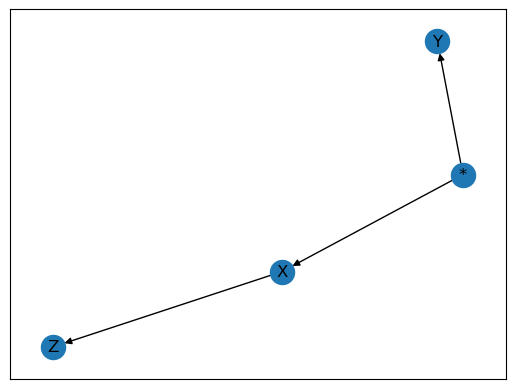

In [31]:
nx.draw_networkx(Tp)